Input:
- True Observations
- Number Training Steps

Output:
- New Model Parameter

Parts of Optimization:
- Initialization of Model Parameter
- tbd

# Initialization

## Import Libraries and Mount Drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch
from torch import distributions, optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/master-thesis

import sys
sys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')

from model.modelcore import epid_model
from model.modelhelper import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GitHub/master-thesis


## Optimization Settings

In [ ]:
start_time='2020-02-26'
end_time='2020-09-30'
observations=['Confirmed_cases', 'Admissions_hospital'] # ['Number_of_deaths', 'Confirmed_cases', 'Admissions_hospital']

dtype = torch.float32
device = torch.device("cuda:0") #cuda:0

## Initialize Observations

In [ ]:
df_obs_initial = pd.read_csv('data/observations_03022022.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])
df_obs = initialize_observations(df_obs_initial, start=start_time, end=end_time, observations=observations)
observed = torch.tensor(df_obs['Confirmed_cases'], requires_grad=False, device=device, dtype=dtype)
df_obs.head(3)

,Date,Confirmed_cases,Admissions_hospital
0,2020-02-26,1,0
1,2020-02-27,1,0
2,2020-02-28,1,0


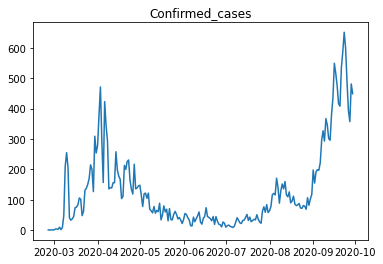

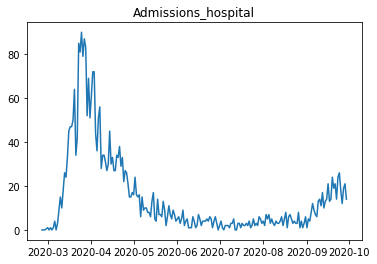

In [ ]:
for observation in observations:
  plt.plot(df_obs['Date'], df_obs[observation])
  plt.title(observation)
  plt.show()

## Initialize Model Parameter

### Initialize Helper Parameter

In [ ]:
cero = torch.tensor(0., requires_grad=False, device=device, dtype=dtype)
num_observations = df_obs.shape[0]
population = torch.tensor(5793636, requires_grad=False, device=device, dtype=dtype)

### Initialize to be optimized Model Parameter

In [ ]:
parameter = ['alpha', 'sigma']
dict_param = initialize_parameter(parameter, device=device, dtype=dtype)

In [ ]:
epsilon_t = initialize_epsilon(num_observations, dict_param['real_values']['sigma'], dtype=dtype, device=device)

# Optimization

## Training

Step: 0, Time: 1.5362443923950195, Loss: 34929.53125, Mean Expected Daily Hospit: 0.28589147329330444


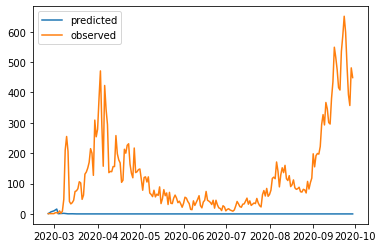

Step: 5, Time: 1.4897689819335938, Loss: 34927.00390625, Mean Expected Daily Hospit: 0.3017013967037201
Step: 10, Time: 1.8632192611694336, Loss: 34923.9609375, Mean Expected Daily Hospit: 0.3197964131832123
Step: 15, Time: 0.7956950664520264, Loss: 34920.1484375, Mean Expected Daily Hospit: 0.3412615954875946
Step: 20, Time: 0.3644270896911621, Loss: 34914.77734375, Mean Expected Daily Hospit: 0.36890438199043274
Step: 25, Time: 0.3778843879699707, Loss: 34904.203125, Mean Expected Daily Hospit: 0.4138612151145935
Step: 30, Time: 0.3990516662597656, Loss: 34866.328125, Mean Expected Daily Hospit: 0.532881498336792
Step: 35, Time: 0.40189051628112793, Loss: 34655.46484375, Mean Expected Daily Hospit: 1.0456894636154175
Step: 40, Time: 0.3840150833129883, Loss: 33301.29296875, Mean Expected Daily Hospit: 3.8678669929504395
Step: 45, Time: 0.3980093002319336, Loss: 25035.267578125, Mean Expected Daily Hospit: 21.344785690307617
Step: 50, Time: 0.3673074245452881, Loss: 18733.498046875, M

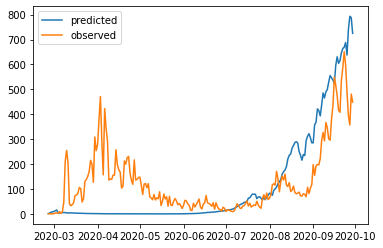

Step: 55, Time: 0.39737653732299805, Loss: 14245.2451171875, Mean Expected Daily Hospit: 56.38515090942383
Step: 60, Time: 0.37117552757263184, Loss: 13553.0693359375, Mean Expected Daily Hospit: 59.14470672607422
Step: 65, Time: 0.37790727615356445, Loss: 13412.27734375, Mean Expected Daily Hospit: 90.89366912841797
Step: 70, Time: 0.39021921157836914, Loss: 12289.1025390625, Mean Expected Daily Hospit: 66.78299713134766
Step: 75, Time: 0.36878299713134766, Loss: 12009.21484375, Mean Expected Daily Hospit: 68.47660064697266
Step: 80, Time: 0.39181995391845703, Loss: 12002.744140625, Mean Expected Daily Hospit: 80.61480712890625
Step: 85, Time: 0.3834261894226074, Loss: 11752.287109375, Mean Expected Daily Hospit: 68.3025894165039
Step: 90, Time: 0.3875443935394287, Loss: 11559.943359375, Mean Expected Daily Hospit: 72.88062286376953
Step: 95, Time: 0.3631246089935303, Loss: 11513.21484375, Mean Expected Daily Hospit: 74.51795959472656
Step: 100, Time: 0.37317419052124023, Loss: 11472.

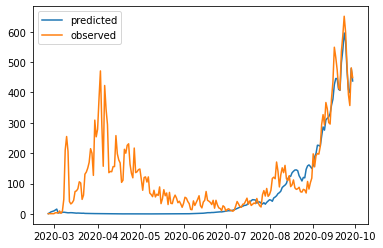

Step: 105, Time: 0.37114763259887695, Loss: 11412.4345703125, Mean Expected Daily Hospit: 73.78144073486328
Step: 110, Time: 0.36637425422668457, Loss: 11366.73828125, Mean Expected Daily Hospit: 71.38025665283203
Step: 115, Time: 0.36719608306884766, Loss: 11339.7099609375, Mean Expected Daily Hospit: 71.41834259033203
Step: 120, Time: 0.3764028549194336, Loss: 11320.1396484375, Mean Expected Daily Hospit: 72.41582489013672
Step: 125, Time: 0.38239264488220215, Loss: 11301.6943359375, Mean Expected Daily Hospit: 70.87669372558594
Step: 130, Time: 0.391171932220459, Loss: 11284.2802734375, Mean Expected Daily Hospit: 72.00849914550781
Step: 135, Time: 0.4071817398071289, Loss: 11268.9091796875, Mean Expected Daily Hospit: 71.22716522216797
Step: 140, Time: 0.39241480827331543, Loss: 11255.4267578125, Mean Expected Daily Hospit: 71.44454956054688
Step: 145, Time: 0.37804651260375977, Loss: 11243.1884765625, Mean Expected Daily Hospit: 71.49166870117188
Step: 150, Time: 0.370153665542602

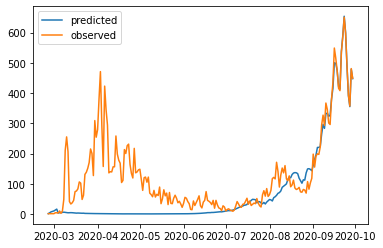

Step: 155, Time: 0.37498903274536133, Loss: 11220.794921875, Mean Expected Daily Hospit: 71.52875518798828
Step: 160, Time: 0.39629244804382324, Loss: 11210.36328125, Mean Expected Daily Hospit: 71.27933502197266
Step: 165, Time: 0.3802986145019531, Loss: 11200.384765625, Mean Expected Daily Hospit: 71.49758911132812
Step: 170, Time: 0.3686187267303467, Loss: 11190.8125, Mean Expected Daily Hospit: 71.39344024658203
Step: 175, Time: 0.37505245208740234, Loss: 11181.595703125, Mean Expected Daily Hospit: 71.50006103515625
Step: 180, Time: 0.40429258346557617, Loss: 11172.6865234375, Mean Expected Daily Hospit: 71.50655364990234
Step: 185, Time: 0.39845728874206543, Loss: 11164.04296875, Mean Expected Daily Hospit: 71.55196380615234
Step: 190, Time: 0.37384843826293945, Loss: 11155.6298828125, Mean Expected Daily Hospit: 71.60901641845703
Step: 195, Time: 0.37192392349243164, Loss: 11147.4208984375, Mean Expected Daily Hospit: 71.63775634765625
Step: 200, Time: 0.38988590240478516, Loss:

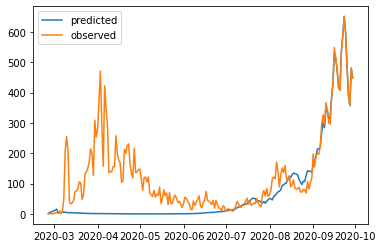

Step: 205, Time: 0.371610164642334, Loss: 11131.5283203125, Mean Expected Daily Hospit: 71.7424087524414
Step: 210, Time: 0.37377119064331055, Loss: 11123.80859375, Mean Expected Daily Hospit: 71.81504821777344
Step: 215, Time: 0.36742401123046875, Loss: 11116.224609375, Mean Expected Daily Hospit: 71.85780334472656
Step: 220, Time: 0.3844578266143799, Loss: 11108.765625, Mean Expected Daily Hospit: 71.92868041992188
Step: 225, Time: 0.38869524002075195, Loss: 11101.4208984375, Mean Expected Daily Hospit: 71.98052978515625
Step: 230, Time: 0.40219831466674805, Loss: 11094.1875, Mean Expected Daily Hospit: 72.05027770996094
Step: 235, Time: 0.40029406547546387, Loss: 11087.0576171875, Mean Expected Daily Hospit: 72.1087875366211
Step: 240, Time: 0.39887356758117676, Loss: 11080.0322265625, Mean Expected Daily Hospit: 72.17825317382812
Step: 245, Time: 0.39801907539367676, Loss: 11073.10546875, Mean Expected Daily Hospit: 72.24124908447266
Step: 250, Time: 0.4123871326446533, Loss: 11066

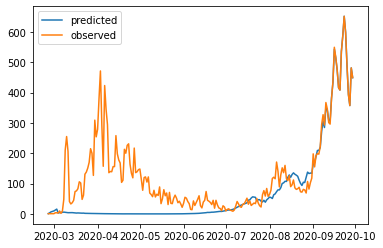

Step: 255, Time: 0.39824342727661133, Loss: 11059.5390625, Mean Expected Daily Hospit: 72.37637329101562
Step: 260, Time: 0.3811030387878418, Loss: 11052.8974609375, Mean Expected Daily Hospit: 72.44576263427734
Step: 265, Time: 0.8102395534515381, Loss: 11046.3515625, Mean Expected Daily Hospit: 72.51271057128906
Step: 270, Time: 0.3693544864654541, Loss: 11039.900390625, Mean Expected Daily Hospit: 72.58161926269531
Step: 275, Time: 0.38689637184143066, Loss: 11033.5400390625, Mean Expected Daily Hospit: 72.64885711669922
Step: 280, Time: 0.3889787197113037, Loss: 11027.2744140625, Mean Expected Daily Hospit: 72.71686553955078
Step: 285, Time: 0.3860633373260498, Loss: 11021.1025390625, Mean Expected Daily Hospit: 72.78350067138672
Step: 290, Time: 0.38486433029174805, Loss: 11015.0224609375, Mean Expected Daily Hospit: 72.85005950927734
Step: 295, Time: 0.3807809352874756, Loss: 11009.0341796875, Mean Expected Daily Hospit: 72.91544342041016
Step: 300, Time: 0.3801403045654297, Loss

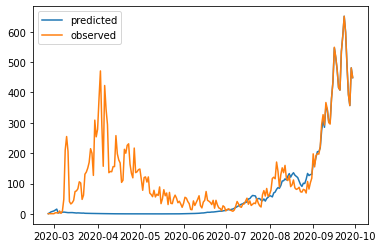

Step: 305, Time: 0.37718701362609863, Loss: 10997.333984375, Mean Expected Daily Hospit: 73.04364776611328
Step: 310, Time: 0.38159799575805664, Loss: 10991.6201171875, Mean Expected Daily Hospit: 73.1062240600586
Step: 315, Time: 0.373737096786499, Loss: 10985.9951171875, Mean Expected Daily Hospit: 73.16744232177734
Step: 320, Time: 0.38336801528930664, Loss: 10980.458984375, Mean Expected Daily Hospit: 73.22750091552734
Step: 325, Time: 0.3761768341064453, Loss: 10975.01171875, Mean Expected Daily Hospit: 73.2861328125
Step: 330, Time: 0.3830893039703369, Loss: 10969.6494140625, Mean Expected Daily Hospit: 73.34344482421875
Step: 335, Time: 0.3884146213531494, Loss: 10964.3701171875, Mean Expected Daily Hospit: 73.39927673339844
Step: 340, Time: 0.39844775199890137, Loss: 10959.17578125, Mean Expected Daily Hospit: 73.45368194580078
Step: 345, Time: 0.37134861946105957, Loss: 10954.0595703125, Mean Expected Daily Hospit: 73.5066146850586
Step: 350, Time: 0.3747396469116211, Loss: 10

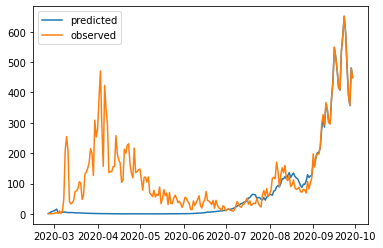

Step: 355, Time: 0.3869752883911133, Loss: 10944.068359375, Mean Expected Daily Hospit: 73.60802459716797
Step: 360, Time: 0.40112853050231934, Loss: 10939.1875, Mean Expected Daily Hospit: 73.65650177001953
Step: 365, Time: 0.3947322368621826, Loss: 10934.3798828125, Mean Expected Daily Hospit: 73.70349884033203
Step: 370, Time: 0.40471863746643066, Loss: 10929.6396484375, Mean Expected Daily Hospit: 73.74897766113281
Step: 375, Time: 0.4281933307647705, Loss: 10924.970703125, Mean Expected Daily Hospit: 73.79307556152344
Step: 380, Time: 0.3793036937713623, Loss: 10920.3701171875, Mean Expected Daily Hospit: 73.83574676513672
Step: 385, Time: 0.38142895698547363, Loss: 10915.8330078125, Mean Expected Daily Hospit: 73.87700653076172
Step: 390, Time: 0.4242687225341797, Loss: 10911.3583984375, Mean Expected Daily Hospit: 73.91692352294922
Step: 395, Time: 0.38614940643310547, Loss: 10906.9423828125, Mean Expected Daily Hospit: 73.95545196533203
Step: 400, Time: 0.3843414783477783, Loss

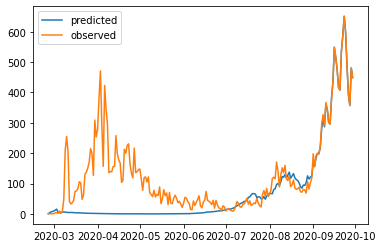

Step: 405, Time: 0.3968980312347412, Loss: 10898.283203125, Mean Expected Daily Hospit: 74.02880859375
Step: 410, Time: 0.36961865425109863, Loss: 10894.033203125, Mean Expected Daily Hospit: 74.06360626220703
Step: 415, Time: 0.39877891540527344, Loss: 10889.8349609375, Mean Expected Daily Hospit: 74.09728240966797
Step: 420, Time: 0.39787888526916504, Loss: 10885.6865234375, Mean Expected Daily Hospit: 74.12979888916016
Step: 425, Time: 0.386521577835083, Loss: 10881.583984375, Mean Expected Daily Hospit: 74.16121673583984
Step: 430, Time: 0.41416025161743164, Loss: 10877.5244140625, Mean Expected Daily Hospit: 74.19164276123047
Step: 435, Time: 0.4042477607727051, Loss: 10873.505859375, Mean Expected Daily Hospit: 74.22110748291016
Step: 440, Time: 0.39612269401550293, Loss: 10869.5283203125, Mean Expected Daily Hospit: 74.24954223632812
Step: 445, Time: 0.37647485733032227, Loss: 10865.5888671875, Mean Expected Daily Hospit: 74.27715301513672
Step: 450, Time: 0.41497802734375, Loss

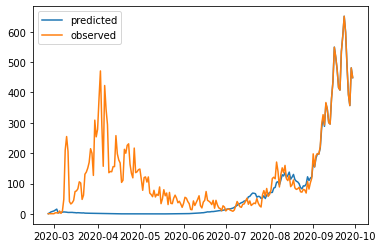

Step: 455, Time: 0.38858747482299805, Loss: 10857.8134765625, Mean Expected Daily Hospit: 74.32971954345703
Step: 460, Time: 0.3793821334838867, Loss: 10853.9716796875, Mean Expected Daily Hospit: 74.35482025146484
Step: 465, Time: 0.6025960445404053, Loss: 10850.162109375, Mean Expected Daily Hospit: 74.37914276123047
Step: 470, Time: 0.394240140914917, Loss: 10846.376953125, Mean Expected Daily Hospit: 74.40289306640625
Step: 475, Time: 0.3877983093261719, Loss: 10842.6181640625, Mean Expected Daily Hospit: 74.42584991455078
Step: 480, Time: 0.39389562606811523, Loss: 10838.8798828125, Mean Expected Daily Hospit: 74.44828033447266
Step: 485, Time: 0.3996250629425049, Loss: 10835.1640625, Mean Expected Daily Hospit: 74.47012329101562
Step: 490, Time: 0.3913145065307617, Loss: 10831.4658203125, Mean Expected Daily Hospit: 74.49134063720703
Step: 495, Time: 0.3820047378540039, Loss: 10827.787109375, Mean Expected Daily Hospit: 74.51214599609375
Step: 500, Time: 0.3968391418457031, Loss:

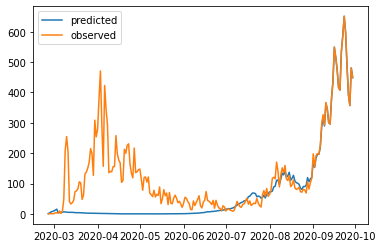

Step: 505, Time: 0.4003715515136719, Loss: 10820.46484375, Mean Expected Daily Hospit: 74.55229949951172
Step: 510, Time: 0.4001920223236084, Loss: 10816.8212890625, Mean Expected Daily Hospit: 74.5718002319336
Step: 515, Time: 0.3870677947998047, Loss: 10813.1865234375, Mean Expected Daily Hospit: 74.59098052978516
Step: 520, Time: 0.40520167350769043, Loss: 10809.5576171875, Mean Expected Daily Hospit: 74.60968780517578
Step: 525, Time: 0.38270092010498047, Loss: 10805.9326171875, Mean Expected Daily Hospit: 74.62816619873047
Step: 530, Time: 0.3854103088378906, Loss: 10802.30859375, Mean Expected Daily Hospit: 74.64643096923828
Step: 535, Time: 0.3829770088195801, Loss: 10798.6865234375, Mean Expected Daily Hospit: 74.66439056396484
Step: 540, Time: 0.4085838794708252, Loss: 10795.0595703125, Mean Expected Daily Hospit: 74.68216705322266
Step: 545, Time: 0.37380075454711914, Loss: 10791.4287109375, Mean Expected Daily Hospit: 74.69969940185547
Step: 550, Time: 0.3695235252380371, Lo

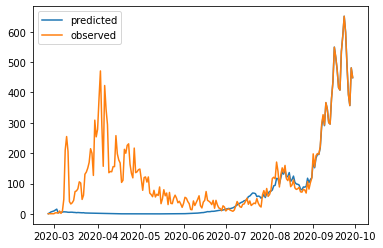

Step: 555, Time: 0.37987351417541504, Loss: 10784.146484375, Mean Expected Daily Hospit: 74.7344741821289
Step: 560, Time: 0.37897253036499023, Loss: 10780.4873046875, Mean Expected Daily Hospit: 74.75165557861328
Step: 565, Time: 0.38494205474853516, Loss: 10776.8154296875, Mean Expected Daily Hospit: 74.76882934570312
Step: 570, Time: 0.3829660415649414, Loss: 10773.126953125, Mean Expected Daily Hospit: 74.78594207763672
Step: 575, Time: 0.3908421993255615, Loss: 10769.4189453125, Mean Expected Daily Hospit: 74.80301666259766
Step: 580, Time: 0.3893272876739502, Loss: 10765.689453125, Mean Expected Daily Hospit: 74.82015991210938
Step: 585, Time: 0.390261173248291, Loss: 10761.9365234375, Mean Expected Daily Hospit: 74.83737182617188
Step: 590, Time: 0.37148165702819824, Loss: 10758.158203125, Mean Expected Daily Hospit: 74.8545913696289
Step: 595, Time: 0.3741261959075928, Loss: 10754.3466796875, Mean Expected Daily Hospit: 74.87187194824219
Step: 600, Time: 0.3909132480621338, Los

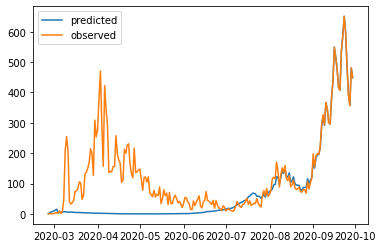

Step: 605, Time: 0.3819262981414795, Loss: 10746.626953125, Mean Expected Daily Hospit: 74.90699005126953
Step: 610, Time: 0.367694616317749, Loss: 10742.7099609375, Mean Expected Daily Hospit: 74.92475128173828
Step: 615, Time: 0.39001941680908203, Loss: 10738.7509765625, Mean Expected Daily Hospit: 74.94278717041016
Step: 620, Time: 0.38367342948913574, Loss: 10734.7470703125, Mean Expected Daily Hospit: 74.96099090576172
Step: 625, Time: 0.38514041900634766, Loss: 10730.6962890625, Mean Expected Daily Hospit: 74.97948455810547
Step: 630, Time: 0.39543962478637695, Loss: 10726.5927734375, Mean Expected Daily Hospit: 74.99835968017578
Step: 635, Time: 0.3930227756500244, Loss: 10722.4326171875, Mean Expected Daily Hospit: 75.01737213134766
Step: 640, Time: 0.3774747848510742, Loss: 10718.212890625, Mean Expected Daily Hospit: 75.03685760498047
Step: 645, Time: 0.38016819953918457, Loss: 10713.9287109375, Mean Expected Daily Hospit: 75.05672454833984
Step: 650, Time: 0.3849594593048095

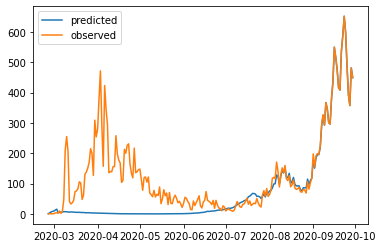

Step: 655, Time: 0.3828139305114746, Loss: 10705.1533203125, Mean Expected Daily Hospit: 75.09756469726562
Step: 660, Time: 0.403545618057251, Loss: 10700.6552734375, Mean Expected Daily Hospit: 75.11871337890625
Step: 665, Time: 0.38120460510253906, Loss: 10696.072265625, Mean Expected Daily Hospit: 75.14036560058594
Step: 670, Time: 0.3888263702392578, Loss: 10691.4052734375, Mean Expected Daily Hospit: 75.16249084472656
Step: 675, Time: 0.36986446380615234, Loss: 10686.6455078125, Mean Expected Daily Hospit: 75.18521118164062
Step: 680, Time: 0.3693239688873291, Loss: 10681.7880859375, Mean Expected Daily Hospit: 75.20860290527344
Step: 685, Time: 0.3906736373901367, Loss: 10676.826171875, Mean Expected Daily Hospit: 75.2325668334961
Step: 690, Time: 0.39634013175964355, Loss: 10671.7568359375, Mean Expected Daily Hospit: 75.25717163085938
Step: 695, Time: 0.3898947238922119, Loss: 10666.5703125, Mean Expected Daily Hospit: 75.28253936767578
Step: 700, Time: 0.3831307888031006, Loss

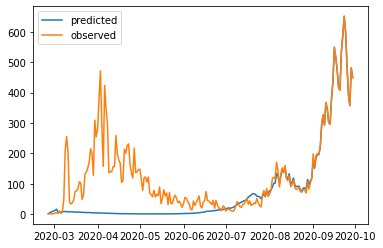

Step: 705, Time: 0.38334131240844727, Loss: 10655.822265625, Mean Expected Daily Hospit: 75.3355712890625
Step: 710, Time: 0.3722991943359375, Loss: 10650.2451171875, Mean Expected Daily Hospit: 75.36326599121094
Step: 715, Time: 0.36991310119628906, Loss: 10644.5205078125, Mean Expected Daily Hospit: 75.39191436767578
Step: 720, Time: 0.4007711410522461, Loss: 10638.64453125, Mean Expected Daily Hospit: 75.42149353027344
Step: 725, Time: 0.3781447410583496, Loss: 10632.6015625, Mean Expected Daily Hospit: 75.45199584960938
Step: 730, Time: 0.37534213066101074, Loss: 10626.384765625, Mean Expected Daily Hospit: 75.48355102539062
Step: 735, Time: 0.39601898193359375, Loss: 10619.984375, Mean Expected Daily Hospit: 75.51631927490234
Step: 740, Time: 0.3866543769836426, Loss: 10613.3876953125, Mean Expected Daily Hospit: 75.55012512207031
Step: 745, Time: 0.38503527641296387, Loss: 10606.583984375, Mean Expected Daily Hospit: 75.58515167236328
Step: 750, Time: 0.4012904167175293, Loss: 10

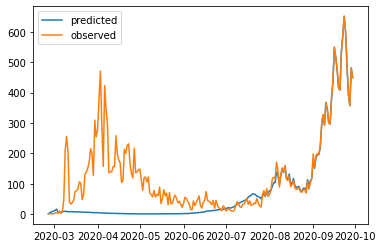

Step: 755, Time: 0.399341344833374, Loss: 10592.30078125, Mean Expected Daily Hospit: 75.65914916992188
Step: 760, Time: 0.39510679244995117, Loss: 10584.79296875, Mean Expected Daily Hospit: 75.69820404052734
Step: 765, Time: 0.3879063129425049, Loss: 10577.01953125, Mean Expected Daily Hospit: 75.73885345458984
Step: 770, Time: 0.38495659828186035, Loss: 10568.9619140625, Mean Expected Daily Hospit: 75.78111267089844
Step: 775, Time: 0.37706422805786133, Loss: 10560.60546875, Mean Expected Daily Hospit: 75.82493591308594
Step: 780, Time: 0.37795495986938477, Loss: 10551.9267578125, Mean Expected Daily Hospit: 75.87053680419922
Step: 785, Time: 0.3688325881958008, Loss: 10542.9052734375, Mean Expected Daily Hospit: 75.91814422607422
Step: 790, Time: 0.37587571144104004, Loss: 10533.517578125, Mean Expected Daily Hospit: 75.96775817871094
Step: 795, Time: 0.3902161121368408, Loss: 10523.734375, Mean Expected Daily Hospit: 76.01941680908203
Step: 800, Time: 0.38439345359802246, Loss: 10

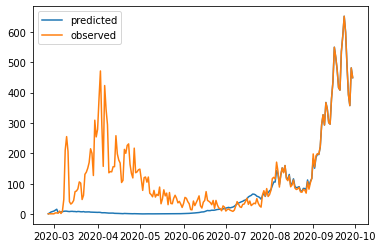

Step: 805, Time: 0.37125372886657715, Loss: 10502.880859375, Mean Expected Daily Hospit: 76.12969207763672
Step: 810, Time: 0.3864920139312744, Loss: 10491.744140625, Mean Expected Daily Hospit: 76.1886215209961
Step: 815, Time: 0.4011406898498535, Loss: 10480.083984375, Mean Expected Daily Hospit: 76.25027465820312
Step: 820, Time: 0.394336462020874, Loss: 10467.8642578125, Mean Expected Daily Hospit: 76.31474304199219
Step: 825, Time: 0.3798973560333252, Loss: 10455.0380859375, Mean Expected Daily Hospit: 76.38243103027344
Step: 830, Time: 0.3863184452056885, Loss: 10441.5576171875, Mean Expected Daily Hospit: 76.4534683227539
Step: 835, Time: 0.3887951374053955, Loss: 10427.369140625, Mean Expected Daily Hospit: 76.52806854248047
Step: 840, Time: 0.38190793991088867, Loss: 10412.412109375, Mean Expected Daily Hospit: 76.6064453125
Step: 845, Time: 0.38515710830688477, Loss: 10396.62109375, Mean Expected Daily Hospit: 76.68898010253906
Step: 850, Time: 0.3757314682006836, Loss: 10379

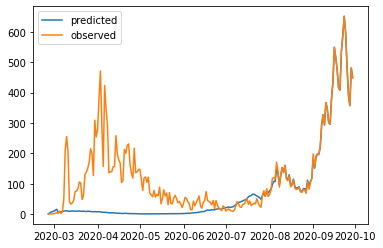

Step: 855, Time: 0.37189698219299316, Loss: 10362.2314453125, Mean Expected Daily Hospit: 76.86793518066406
Step: 860, Time: 0.38323330879211426, Loss: 10343.4560546875, Mean Expected Daily Hospit: 76.96501922607422
Step: 865, Time: 0.37987852096557617, Loss: 10323.4951171875, Mean Expected Daily Hospit: 77.0677719116211
Step: 870, Time: 0.38684821128845215, Loss: 10302.228515625, Mean Expected Daily Hospit: 77.17666625976562
Step: 875, Time: 0.3919205665588379, Loss: 10279.5263671875, Mean Expected Daily Hospit: 77.29241943359375
Step: 880, Time: 0.39455270767211914, Loss: 10255.234375, Mean Expected Daily Hospit: 77.41548919677734
Step: 885, Time: 0.3849787712097168, Loss: 10229.1875, Mean Expected Daily Hospit: 77.54668426513672
Step: 890, Time: 0.3814659118652344, Loss: 10201.18359375, Mean Expected Daily Hospit: 77.68672943115234
Step: 895, Time: 0.3746762275695801, Loss: 10171.0009765625, Mean Expected Daily Hospit: 77.83666229248047
Step: 900, Time: 0.37773728370666504, Loss: 10

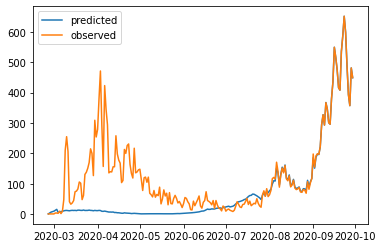

Step: 905, Time: 0.38281726837158203, Loss: 10103.017578125, Mean Expected Daily Hospit: 78.17050170898438
Step: 910, Time: 0.3744387626647949, Loss: 10064.5654296875, Mean Expected Daily Hospit: 78.35701751708984
Step: 915, Time: 0.37860536575317383, Loss: 10022.6142578125, Mean Expected Daily Hospit: 78.5587387084961
Step: 920, Time: 0.3807961940765381, Loss: 9976.681640625, Mean Expected Daily Hospit: 78.77760314941406
Step: 925, Time: 0.38034987449645996, Loss: 9926.1953125, Mean Expected Daily Hospit: 79.01580810546875
Step: 930, Time: 0.39665913581848145, Loss: 9870.4765625, Mean Expected Daily Hospit: 79.27607727050781
Step: 935, Time: 0.36983728408813477, Loss: 9808.70703125, Mean Expected Daily Hospit: 79.56167602539062
Step: 940, Time: 0.3717329502105713, Loss: 9739.90625, Mean Expected Daily Hospit: 79.87630462646484
Step: 945, Time: 0.3746523857116699, Loss: 9662.8740234375, Mean Expected Daily Hospit: 80.22463989257812
Step: 950, Time: 0.3803834915161133, Loss: 9576.142578

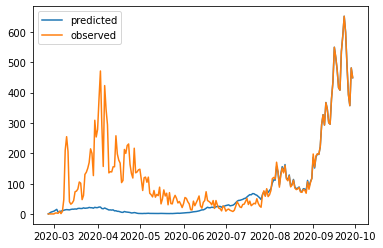

Step: 955, Time: 0.3781759738922119, Loss: 9477.8974609375, Mean Expected Daily Hospit: 81.04658508300781
Step: 960, Time: 0.38809633255004883, Loss: 9365.880859375, Mean Expected Daily Hospit: 81.53577423095703
Step: 965, Time: 0.38045644760131836, Loss: 9237.2451171875, Mean Expected Daily Hospit: 82.09088897705078
Step: 970, Time: 0.3895576000213623, Loss: 9088.3837890625, Mean Expected Daily Hospit: 82.72588348388672
Step: 975, Time: 0.385894775390625, Loss: 8914.6748046875, Mean Expected Daily Hospit: 83.45854949951172
Step: 980, Time: 0.39331698417663574, Loss: 8710.15234375, Mean Expected Daily Hospit: 84.31229400634766
Step: 985, Time: 0.3928549289703369, Loss: 8467.0654296875, Mean Expected Daily Hospit: 85.31784057617188
Step: 990, Time: 0.3763926029205322, Loss: 8175.29150390625, Mean Expected Daily Hospit: 86.51651000976562
Step: 995, Time: 0.37069034576416016, Loss: 7821.65283203125, Mean Expected Daily Hospit: 87.96439361572266


In [ ]:
epochs = 1000

params_to_be_optimized = [epsilon_t]
for param in parameter:
  params_to_be_optimized.append(dict_param['prime_values'][param])

optimizer = optim.Adam(params_to_be_optimized, lr=0.01, weight_decay=1e-8)

for i in range(epochs):
  start_time = time.time()
  optimizer.zero_grad()

  # forward pass
  transform_prime_variables(dict_param)
  expected = epid_model(population, R=torch.abs(epsilon_t), initial_newly_infected=np.arange(1, 18, 3), alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)['newly_infected']

  # calc loss
  comparison_loss = calc_mse(expected, observed)
  prior_loss = calc_prior_loss(dict_param, device=device, dtype=dtype)
  rw_loss = calc_random_walk_loss(epsilon_t, dict_param['real_values']['sigma'], device=device, dtype=dtype )
  loss = comparison_loss + prior_loss 

  # backward pass
  loss.backward()
  optimizer.step()

  if i % 5==0:
      print(f'Step: {i}, Time: {time.time() - start_time}, Loss: {loss}, Mean Expected Daily Hospit: {expected.cpu().detach().numpy().mean()}')
  
  if i % 50==0:
    plt.plot(df_obs['Date'], expected.cpu().detach().numpy(), label='predicted')
    plt.plot(df_obs['Date'], observed.cpu().detach().numpy(), label='observed')
    plt.legend()
    plt.show()


# Evaluation

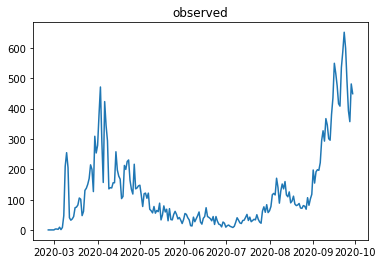

In [ ]:
plt.plot(df_obs['Date'], observed.cpu().detach().numpy())
plt.title('observed')
plt.show()

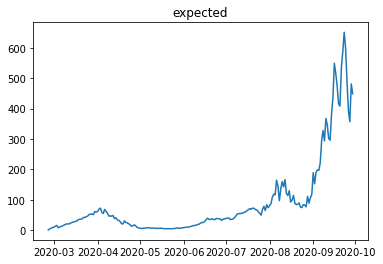

In [ ]:
plt.plot(df_obs['Date'], expected.cpu().detach().numpy())
plt.title('expected')
plt.show()